##News Article Classification


In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

##Reading Data

In [ ]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

##Data Exploration

In [ ]:
train_df.head()


Class Index  \
0            3   
1            3   
2            3   
3            3   
4            3   

                                                                       Title  \
0                          Wall St. Bears Claw Back Into the Black (Reuters)   
1                        Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                            Oil and Economy Cloud Stocks' Outlook (Reuters)   
3               Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4  Oil prices soar to all-time record, posing new menace to US economy (AFP)   

                                                                                                                                                                                                              Description  
0                                                                                                                          Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.  
1  Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.  
2                                Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.  
3                     Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.  
4                                                        AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.

In [ ]:
train_df.shape

(120000, 3)

In [ ]:
test_df.head()

Class Index  \
0            3   
1            4   
2            4   
3            4   
4            4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.  
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.  
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.  
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.  
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


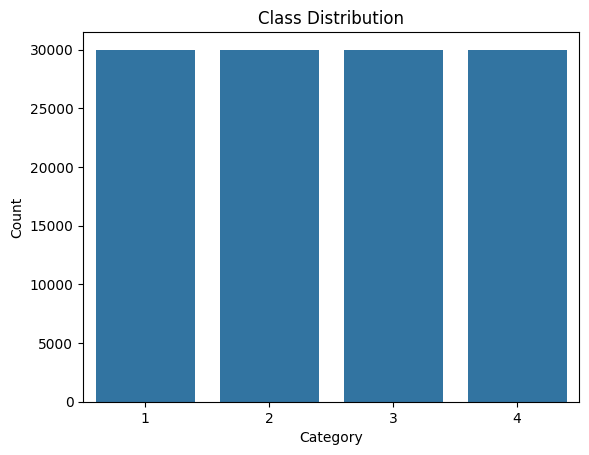

In [ ]:
sns.countplot(x='Class Index', data=train_df)
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



In [ ]:
label_names = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}
train_df['label_name'] = train_df['Class Index'].map(label_names)
test_df['label_name'] = test_df['Class Index'].map(label_names)

In [ ]:
train_df.head()

Class Index  \
0            3   
1            3   
2            3   
3            3   
4            3   

                                                                       Title  \
0                          Wall St. Bears Claw Back Into the Black (Reuters)   
1                        Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                            Oil and Economy Cloud Stocks' Outlook (Reuters)   
3               Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4  Oil prices soar to all-time record, posing new menace to US economy (AFP)   

                                                                                                                                                                                                              Description  \
0                                                                                                                          Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.   
1  Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.   
2                                Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.   
3                     Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.   
4                                                        AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.   

  label_name  
0   Business  
1   Business  
2   Business  
3   Business  
4   Business

In [ ]:
test_df.head()

Class Index  \
0            3   
1            4   
2            4   
3            4   
4            4   

                                                                                    Title  \
0                                                       Fears for T N pension after talks   
1  The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)   
2                                           Ky. Company Wins Grant to Study Peptides (AP)   
3                                           Prediction Unit Helps Forecast Wildfires (AP)   
4                                             Calif. Aims to Limit Farm-Related Smog (AP)   

                                                                                                                                                                                                                                                                        Description  \
0                                                                                                                                                   Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.   
1                                        SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.   
2                                                            AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.   
3  AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.   
4                                                                                               AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.   

  label_name  
0   Business  
1   Sci/Tech  
2   Sci/Tech  
3   Sci/Tech  
4   Sci/Tech

In [ ]:
pd.set_option('display.max_colwidth', None)
train_df.head()

Class Index  \
0            3   
1            3   
2            3   
3            3   
4            3   

                                                                       Title  \
0                          Wall St. Bears Claw Back Into the Black (Reuters)   
1                        Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                            Oil and Economy Cloud Stocks' Outlook (Reuters)   
3               Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4  Oil prices soar to all-time record, posing new menace to US economy (AFP)   

                                                                                                                                                                                                              Description  \
0                                                                                                                          Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.   
1  Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.   
2                                Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.   
3                     Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.   
4                                                        AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.   

  label_name  
0   Business  
1   Business  
2   Business  
3   Business  
4   Business

##Data Preprocessing

In [ ]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Class Index    0
Title          0
Description    0
label_name     0
dtype: int64
Class Index    0
Title          0
Description    0
label_name     0
dtype: int64


In [ ]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [ ]:
import string
train_df['text'] = train_df['Title'] + " " + train_df['Description']
test_df['text'] = test_df['Title'] + " " + test_df['Description']
stop_words = set(stopwords.words('english'))

def preprocessing(text):
  # lowercase
    text = text.lower()
  # tokenize
    tokens = word_tokenize(text.lower())
  # remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
  # remove punctuation
    filtered_tokens = [token for token in filtered_tokens if token not in string.punctuation]
  # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # join tokens back
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


train_df['clean_text'] = train_df['text'].apply(preprocessing)
test_df['clean_text'] = test_df['text'].apply(preprocessing)

In [ ]:
train_df

Class Index  \
0                 3   
1                 3   
2                 3   
3                 3   
4                 3   
...             ...   
119995            1   
119996            2   
119997            2   
119998            2   
119999            2   

                                                                            Title  \
0                               Wall St. Bears Claw Back Into the Black (Reuters)   
1                             Carlyle Looks Toward Commercial Aerospace (Reuters)   
2                                 Oil and Economy Cloud Stocks' Outlook (Reuters)   
3                    Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)   
4       Oil prices soar to all-time record, posing new menace to US economy (AFP)   
...                                                                           ...   
119995                         Pakistan's Musharraf Says Won't Quit as Army Chief   
119996                                          Renteria signing a top-shelf deal   
119997                                            Saban not going to Dolphins yet   
119998                                                          Today's NFL games   
119999                                               Nets get Carter from Raptors   

                                                                                                                                                                                                                                                                                                                                                             Description  \
0                                                                                                                                                                                                                                                                         Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.   
1                                                                                                                                                 Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.   
2                                                                                                                                                                               Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.   
3                                                                                                                                                                    Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.   
4                                                                                                                                                                                                       AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.   
...                                                                                                                                                                                                                                                                                                                                                                  ...   
119995                                                                                                                                                            

In [ ]:
# drop uneeded columns

train_df.drop(columns=['Title', 'Description', 'text'], inplace=True, errors='ignore')
test_df.drop(columns=['Title', 'Description', 'text'], inplace=True, errors='ignore')

train_df.head()

Class Index label_name  \
0            3   Business   
1            3   Business   
2            3   Business   
3            3   Business   
4            3   Business   

                                                                                                                                                                                                                       clean_text  
0                                                                                                             wall st. bear claw back black reuters reuters short-sellers wall street 's dwindling\band ultra-cynics seeing green  
1  carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group \which reputation making well-timed occasionally\controversial play defense industry quietly placed\its bet another part market  
2                                               oil economy cloud stock outlook reuters reuters soaring crude price plus worries\about economy outlook earnings expected to\hang stock market next week depth the\summer doldrums  
3        iraq halt oil export main southern pipeline reuters reuters authority halted oil export\flows main pipeline southern iraq after\intelligence showed rebel militia could strike\infrastructure oil official said saturday  
4                             oil price soar all-time record posing new menace u economy afp afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election

In [ ]:
train_df.head()

Class Index label_name  \
0            3   Business   
1            3   Business   
2            3   Business   
3            3   Business   
4            3   Business   

                                                                                                                                                                                                                       clean_text  
0                                                                                                             wall st. bear claw back black reuters reuters short-sellers wall street 's dwindling\band ultra-cynics seeing green  
1  carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group \which reputation making well-timed occasionally\controversial play defense industry quietly placed\its bet another part market  
2                                               oil economy cloud stock outlook reuters reuters soaring crude price plus worries\about economy outlook earnings expected to\hang stock market next week depth the\summer doldrums  
3        iraq halt oil export main southern pipeline reuters reuters authority halted oil export\flows main pipeline southern iraq after\intelligence showed rebel militia could strike\infrastructure oil official said saturday  
4                             oil price soar all-time record posing new menace u economy afp afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election

In [ ]:
test_df.head()

Class Index label_name  \
0            3   Business   
1            4   Sci/Tech   
2            4   Sci/Tech   
3            4   Sci/Tech   
4            4   Sci/Tech   

                                                                                                                                                                                                                                                                 clean_text  
0                                                                                                                                                     fear n pension talk union representing worker turner newall say 'disappointed talk stricken parent firm federal mogul  
1  race second private team set launch date human spaceflight space.com space.com toronto canada -- second\team rocketeers competing 36 10 million ansari x prize contest for\privately funded suborbital space flight officially announced first\launch date manned rocket  
2                                                                          ky. company win grant study peptide ap ap company founded chemistry researcher university louisville grant develop method producing better peptide short chain amino acid building block protein  
3                                                prediction unit help forecast wildfire ap ap 's barely dawn mike fitzpatrick start shift blur colorful map figure endless chart already know day bring lightning strike place expects wind pick moist place dry flame roar  
4                                                                              calif. aim limit farm-related smog ap ap southern california 's smog-fighting agency went emission bovine variety friday adopting nation 's first rule reduce air pollution dairy cow manure

##Splitting Training Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train_df['clean_text'], train_df['label_name'], test_size=0.2, random_state=42)


In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (96000,)
X_test shape: (24000,)
y_train shape: (96000,)
y_test shape: (24000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on training text only
X_train_tfidf = tfidf.fit_transform(x_train)

# Transform validation/ text using the same vectorizer
X_test_tfidf = tfidf.transform(x_test)



In [ ]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(96000, 5000)
(24000, 5000)


##Training The Model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)



LogisticRegression(max_iter=1000, random_state=42)

##Evaluating The Model

In [ ]:

y_pred = model.predict(X_test_tfidf)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.9099583333333333

 Classification Report:
               precision    recall  f1-score   support

    Business       0.87      0.88      0.88      5911
    Sci/Tech       0.89      0.88      0.89      6075
      Sports       0.95      0.98      0.96      6058
       World       0.92      0.90      0.91      5956

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



##Testing The Model on Unseen Data

In [ ]:
test_df.head()

Class Index label_name  \
0            3   Business   
1            4   Sci/Tech   
2            4   Sci/Tech   
3            4   Sci/Tech   
4            4   Sci/Tech   

                                                                                                                                                                                                                                                                 clean_text  
0                                                                                                                                                     fear n pension talk union representing worker turner newall say 'disappointed talk stricken parent firm federal mogul  
1  race second private team set launch date human spaceflight space.com space.com toronto canada -- second\team rocketeers competing 36 10 million ansari x prize contest for\privately funded suborbital space flight officially announced first\launch date manned rocket  
2                                                                          ky. company win grant study peptide ap ap company founded chemistry researcher university louisville grant develop method producing better peptide short chain amino acid building block protein  
3                                                prediction unit help forecast wildfire ap ap 's barely dawn mike fitzpatrick start shift blur colorful map figure endless chart already know day bring lightning strike place expects wind pick moist place dry flame roar  
4                                                                              calif. aim limit farm-related smog ap ap southern california 's smog-fighting agency went emission bovine variety friday adopting nation 's first rule reduce air pollution dairy cow manure

In [ ]:

x_final_test = tfidf.transform(test_df['clean_text'])

y_final_test = test_df['label_name']


y_final_pred = model.predict(x_final_test)

print("Final Test Accuracy:", accuracy_score(y_final_test, y_final_pred))
print(classification_report(y_final_test, y_final_pred))


Final Test Accuracy: 0.9068421052631579
              precision    recall  f1-score   support

    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.88      0.88      0.88      1900
      Sports       0.95      0.98      0.96      1900
       World       0.92      0.90      0.91      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



##Visualization

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(texts, actual_labels, predicted_labels, n=10):

    plt.figure(figsize=(12, n * 2.5))

    for i in range(n):
        actual = actual_labels[i]
        predicted = predicted_labels[i]
        is_correct = actual == predicted
        color = 'green' if is_correct else 'red'

        plt.subplot(n, 1, i + 1)
        plt.axis('off')

        # Show the news text (truncate to 250 chars)
        plt.text(0, 0.8, f" Text: {texts[i][:250]}...", fontsize=10, wrap=True)

        # Show actual label
        plt.text(0, 0.5, f" Actual: {actual}", fontsize=12, color="black")

        # Show predicted label in color
        plt.text(0, 0.2, f" Predicted: {predicted}", fontsize=12, color=color)

    plt.tight_layout()
    plt.show()


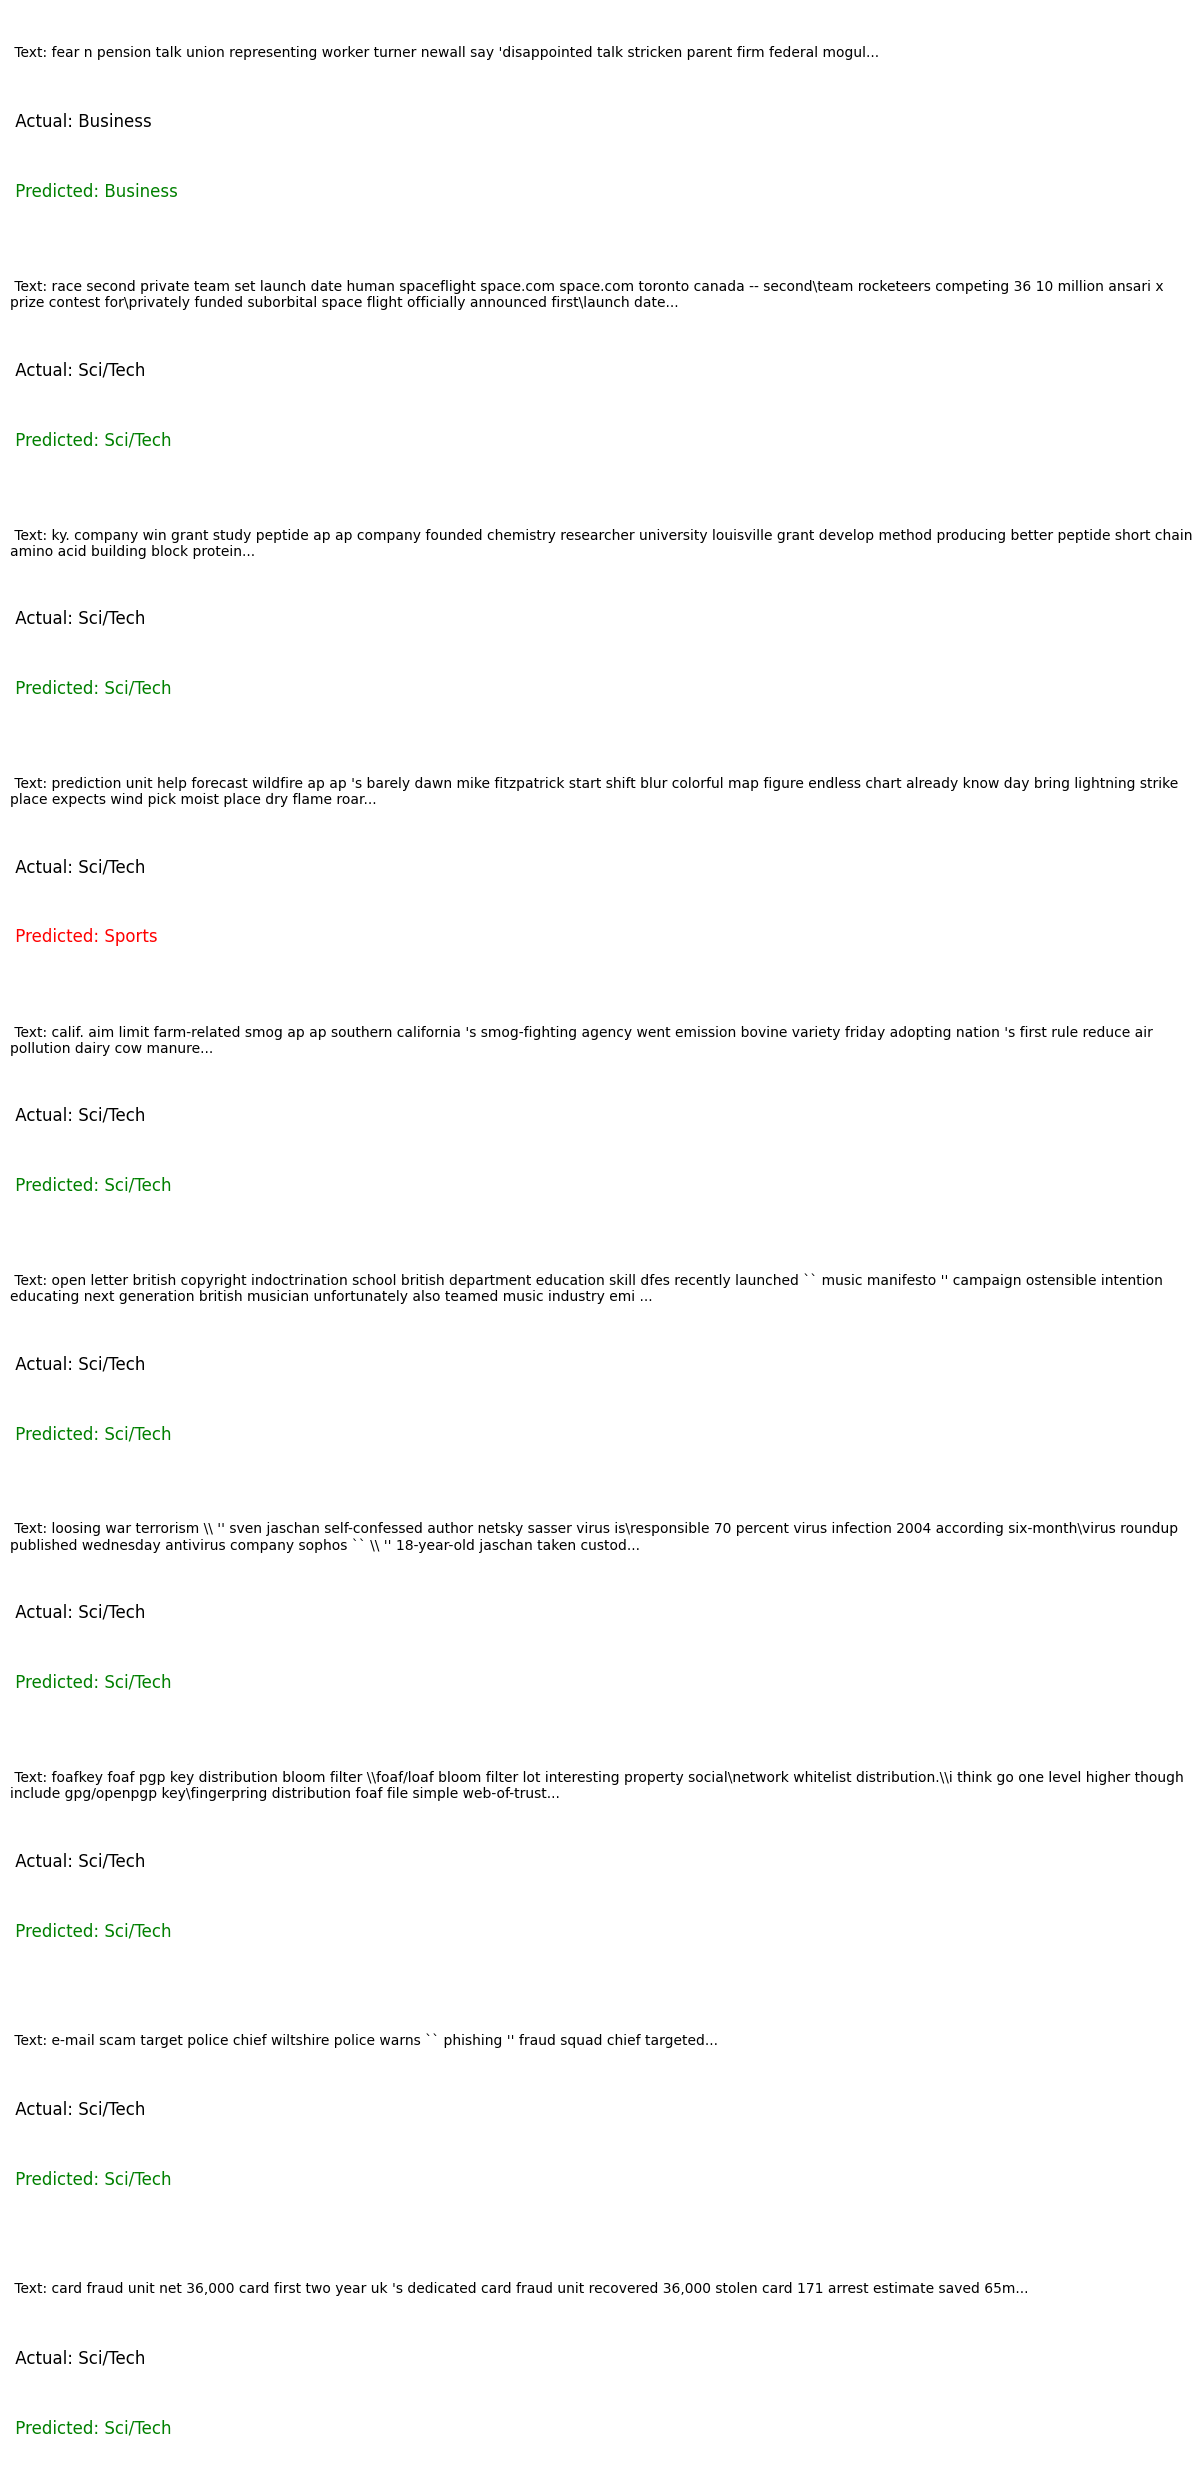

In [ ]:

sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plot_predictions(
    texts=test_df['clean_text'].iloc[sample_indices].tolist(),
    actual_labels=test_df['label_name'].iloc[sample_indices].tolist(),
    predicted_labels=y_final_pred[sample_indices],
    n=10
)


##Training The Model (Linear SVc)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Train the model
svc_model = LinearSVC(max_iter=1000, random_state=42)
svc_model.fit(X_train_tfidf, y_train)


LinearSVC(random_state=42)

##Evaluating The Model

In [ ]:

svc_pred = svc_model.predict(X_test_tfidf)

print(" LinearSVC Accuracy:", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))


 LinearSVC Accuracy: 0.908
              precision    recall  f1-score   support

    Business       0.87      0.88      0.87      5911
    Sci/Tech       0.89      0.88      0.89      6075
      Sports       0.95      0.98      0.96      6058
       World       0.92      0.89      0.91      5956

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



##Testing The Model on Unseen Data


In [ ]:

x_final_test = tfidf.transform(test_df['clean_text'])

y_final_test = test_df['label_name']


y_final_pred = svc_model.predict(x_final_test)

print("Final Test Accuracy :", accuracy_score(y_final_test, y_final_pred))
print(classification_report(y_final_test, y_final_pred))


Final Test Accuracy : 0.9084210526315789
              precision    recall  f1-score   support

    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.88      0.88      0.88      1900
      Sports       0.95      0.98      0.97      1900
       World       0.92      0.90      0.91      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

